In [ ]:
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 7.2 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 2s (2,974 kB/s)
debconf: unable to initi

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"leebinhye","key":"1c2a994b1f219dae812f61d6d810b0f6"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d andrewmvd/car-plate-detection
!mkdir ./data
%cd ./data 
!unzip /content/car-plate-detection.zip
%cd /content

In [ ]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 12393, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 12393 (delta 33), reused 30 (delta 11), pack-reused 12335
Receiving objects: 100% (12393/12393), 12.21 MiB | 26.37 MiB/s, done.
Resolving deltas: 100% (8547/8547), done.


In [ ]:
!cd yolov5;pip install -qr requirements.txt

     |████████████████████████████████| 596 kB 7.2 MB/s 


In [ ]:
import os

root_dir="/content/data"

for dir in sorted(next(os.walk(root_dir))[1]):
  print(dir)
  subdir=os.path.join(root_dir,dir)
  for ind,subdir_1 in enumerate(sorted(next(os.walk(subdir))[2])):
    if ind==10:break
    print("    |----",subdir_1)

annotations
    |---- Cars0.xml
    |---- Cars1.xml
    |---- Cars10.xml
    |---- Cars100.xml
    |---- Cars101.xml
    |---- Cars102.xml
    |---- Cars103.xml
    |---- Cars104.xml
    |---- Cars105.xml
    |---- Cars106.xml
images
    |---- Cars0.png
    |---- Cars1.png
    |---- Cars10.png
    |---- Cars100.png
    |---- Cars101.png
    |---- Cars102.png
    |---- Cars103.png
    |---- Cars104.png
    |---- Cars105.png
    |---- Cars106.png


In [ ]:
import xml.etree.ElementTree as ET

def xml_to_text(input_xml_file,output_txt_file):

  tree=ET.parse(input_xml_file)
  root=tree.getroot()

  # get img size
  img_size=root.find("size")
  img_w=int(img_size.find("width").text)
  img_h=int(img_size.find("height").text)

  # get bbox coordinate
  objects=root.findall("object")
  with open(output_txt_file,"w") as f:
    for obj in objects:
      box=obj.find("bndbox")
      x1=int(box.find("xmin").text)
      y1=int(box.find("ymin").text)
      x2=int(box.find("xmax").text)
      y2=int(box.find("ymax").text)

      # bbox yolo format transform
      c_x_norm=round( ((x2+x1)/2)/img_w , 4 )
      c_y_norm=round( ((y2+y1)/2)/img_h , 4 )
      w_norm=round( (x2-x1)/img_w , 4 )
      h_norm=round( (y2-y1)/img_h , 4 )

      txt_values="{} {} {} {} {}".format(0,c_x_norm,c_y_norm,w_norm,h_norm)
      f.write(txt_values)


In [ ]:
from sklearn.model_selection import train_test_split
import pandas as pd

def make_DataFrame(root_dir):
  img_names=[]
  img_files=[]
  xml_files=[]

  for i in os.listdir(os.path.join(root_dir,"annotations")):
    img_name=i[:i.rfind(".")]
    img_names.append(img_name)
    img_file=os.path.join(root_dir,"images/"+img_name+".png")
    img_files.append(img_file)
    xml_file=os.path.join(root_dir,"annotations/"+img_name+".xml")
    xml_files.append(xml_file)

  data_df=pd.DataFrame({"img_name":img_names,"img_file":img_files,"xml_file":xml_files})
  
  return data_df

In [ ]:
data_df=make_DataFrame("/content/data")
data_df.head()

,img_name,img_file,xml_file
0,Cars256,/content/data/images/Cars256.png,/content/data/annotations/Cars256.xml
1,Cars363,/content/data/images/Cars363.png,/content/data/annotations/Cars363.xml
2,Cars361,/content/data/images/Cars361.png,/content/data/annotations/Cars361.xml
3,Cars304,/content/data/images/Cars304.png,/content/data/annotations/Cars304.xml
4,Cars44,/content/data/images/Cars44.png,/content/data/annotations/Cars44.xml


In [ ]:
from sklearn.model_selection import train_test_split

train_df,val_df=train_test_split(data_df,test_size=0.25,random_state=2022)
train_df.shape,val_df.shape

((324, 3), (109, 3))

In [ ]:
train_df.sort_values("img_name")

,img_name,img_file,xml_file
156,Cars0,/content/data/images/Cars0.png,/content/data/annotations/Cars0.xml
366,Cars10,/content/data/images/Cars10.png,/content/data/annotations/Cars10.xml
276,Cars100,/content/data/images/Cars100.png,/content/data/annotations/Cars100.xml
48,Cars101,/content/data/images/Cars101.png,/content/data/annotations/Cars101.xml
11,Cars102,/content/data/images/Cars102.png,/content/data/annotations/Cars102.xml
...,...,...,...
187,Cars94,/content/data/images/Cars94.png,/content/data/annotations/Cars94.xml
242,Cars95,/content/data/images/Cars95.png,/content/data/annotations/Cars95.xml
91,Cars97,/content/data/images/Cars97.png,/content/data/annotations/Cars97.xml
133,Cars98,/content/data/images/Cars98.png,/content/data/annotations/Cars98.xml


In [ ]:
val_df.sort_values("img_name")

,img_name,img_file,xml_file
75,Cars1,/content/data/images/Cars1.png,/content/data/annotations/Cars1.xml
233,Cars104,/content/data/images/Cars104.png,/content/data/annotations/Cars104.xml
41,Cars11,/content/data/images/Cars11.png,/content/data/annotations/Cars11.xml
128,Cars118,/content/data/images/Cars118.png,/content/data/annotations/Cars118.xml
432,Cars128,/content/data/images/Cars128.png,/content/data/annotations/Cars128.xml
...,...,...,...
409,Cars83,/content/data/images/Cars83.png,/content/data/annotations/Cars83.xml
25,Cars84,/content/data/images/Cars84.png,/content/data/annotations/Cars84.xml
345,Cars90,/content/data/images/Cars90.png,/content/data/annotations/Cars90.xml
93,Cars91,/content/data/images/Cars91.png,/content/data/annotations/Cars91.xml


In [ ]:
!mkdir /content/Vehicle_registration_plates;
!cd /content/Vehicle_registration_plates; mkdir images; mkdir labels;
!cd /content/Vehicle_registration_plates/images; mkdir train; mkdir val
!cd /content/Vehicle_registration_plates/labels; mkdir train; mkdir val

In [ ]:
import shutil

def make_yolo_format(df,output_txt_dir,output_img_dir):

  for ind,row in df.iterrows():
    img_name=row["img_name"]
    input_xml_file=row["xml_file"]
    output_txt_file=os.path.join(output_txt_dir,img_name+".txt")
    xml_to_text(input_xml_file,output_txt_file)

    shutil.copy(row["img_file"],output_img_dir)

In [ ]:
make_yolo_format(train_df,
                 "/content/Vehicle_registration_plates/labels/train",
                 "/content/Vehicle_registration_plates/images/train")
make_yolo_format(val_df,
                 "/content/Vehicle_registration_plates/labels/val",
                 "/content/Vehicle_registration_plates/images/val")

In [ ]:
!wget -O /content/Vehicle_registration_plates/License_Plate_Recognition.yaml https://raw.githubusercontent.com/HyeBin-Hub/License_Plate_Recognition/main/License_Plate_Recognition.yaml

--2022-07-04 04:04:31--  https://raw.githubusercontent.com/HyeBin-Hub/License_Plate_Recognition/main/License_Plate_Recognition.yaml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181 [text/plain]
Saving to: ‘/content/Vehicle_registration_plates/License_Plate_Recognition.yaml’

/content/Vehicle_re 100%[===================>]     181  --.-KB/s    in 0s      

2022-07-04 04:04:31 (8.99 MB/s) - ‘/content/Vehicle_registration_plates/License_Plate_Recognition.yaml’ saved [181/181]



In [ ]:
import os, sys 
from google.colab import drive 

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive

In [ ]:
!cd /content/yolov5; python train.py --img 640 \
                                     --batch 8 \
                                     --epochs 15 \
                                     --data /content/Vehicle_registration_plates/License_Plate_Recognition.yaml \
                                     --weights yolov5l.pt \
                                     --project=/mydrive/ultra_workdir \
                                     --name Vehicle_registration_plates \
                                     --exist-ok 

train: weights=yolov5l.pt, cfg=, data=/content/Vehicle_registration_plates/License_Plate_Recognition.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=15, batch_size=8, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=/mydrive/ultra_workdir, name=Vehicle_registration_plates, exist_ok=True, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, o

In [ ]:
!cd /content/yolov5;python detect.py --source /content/Vehicle_registration_plates/images/train/Cars18.png \
                            --weights /content/gdrive/MyDrive/ultra_workdir/Vehicle_registration_plates/weights/best.pt \
                            --conf 0.6 \
                            --project=/content/data/output \
                            --name=run_image \
                            --exist-ok \
                            --line-thickness 2 \
                            --save-txt \
                            --save-conf

detect: weights=['/content/gdrive/MyDrive/ultra_workdir/Vehicle_registration_plates/weights/best.pt'], source=/content/Vehicle_registration_plates/images/train/Cars18.png, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.6, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=/content/data/output, name=run_image, exist_ok=True, line_thickness=2, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
image 1/1 /content/Vehicle_registration_plates/images/train/Cars18.png: 512x640 1 licence, Done. (0.024s)
Speed: 0.5ms pre-process, 24.1ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to /content/data/output/run_image

In [ ]:
!cd yolov5; python val.py --weights /content/gdrive/MyDrive/ultra_workdir/Vehicle_registration_plates/weights/best.pt  \
                           --data /content/Vehicle_registration_plates/License_Plate_Recognition.yaml \
                           --project /content/data/output \
                           --name=test_result \
                           --exist-ok \
                           --img 640 \
                           --iou 0.5 \
                           --save-txt \
                           --save-conf \
                           --conf-thres 0.5


val: data=/content/Vehicle_registration_plates/License_Plate_Recognition.yaml, weights=['/content/gdrive/MyDrive/ultra_workdir/Vehicle_registration_plates/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.5, iou_thres=0.5, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=True, save_hybrid=False, save_conf=True, save_json=False, project=/content/data/output, name=test_result, exist_ok=True, half=False, dnn=False
YOLOv5 🚀 v6.1-275-g29d79a6 Python-3.7.13 torch-1.11.0+cu113 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 367 layers, 46108278 parameters, 0 gradients, 107.6 GFLOPs
val: Scanning '/content/Vehicle_registration_plates/labels/val.cache' images and labels... 109 found, 0 missing, 0 empty, 0 corrupt: 100% 109/109 [00:00<?, ?it/s]
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95: 100% 4/4 [00:04<00:00,  1.24s/it]
                 all        109         66      0.955       0

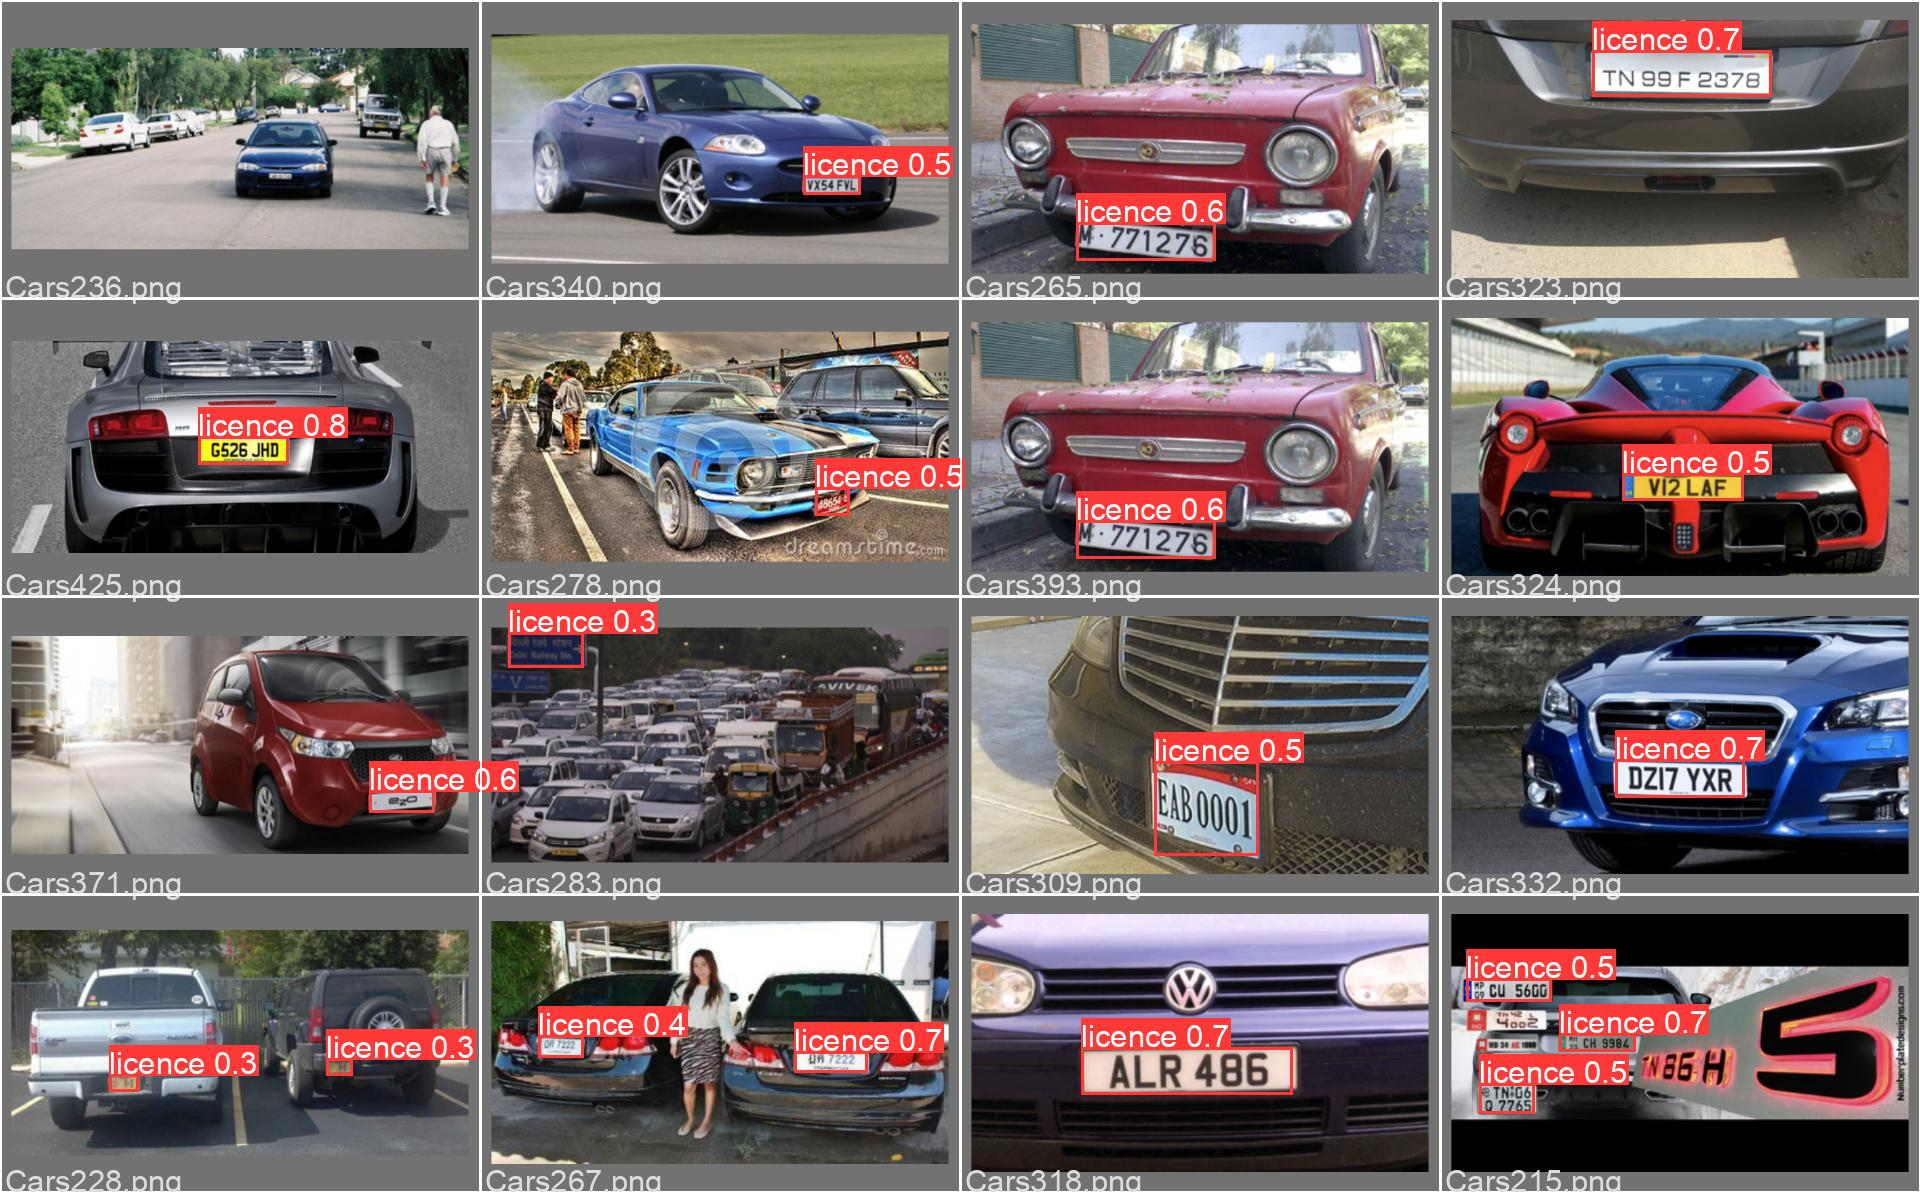

In [ ]:
from IPython.display import Image
Image("/content/data/output/test_result/val_batch0_pred.jpg")

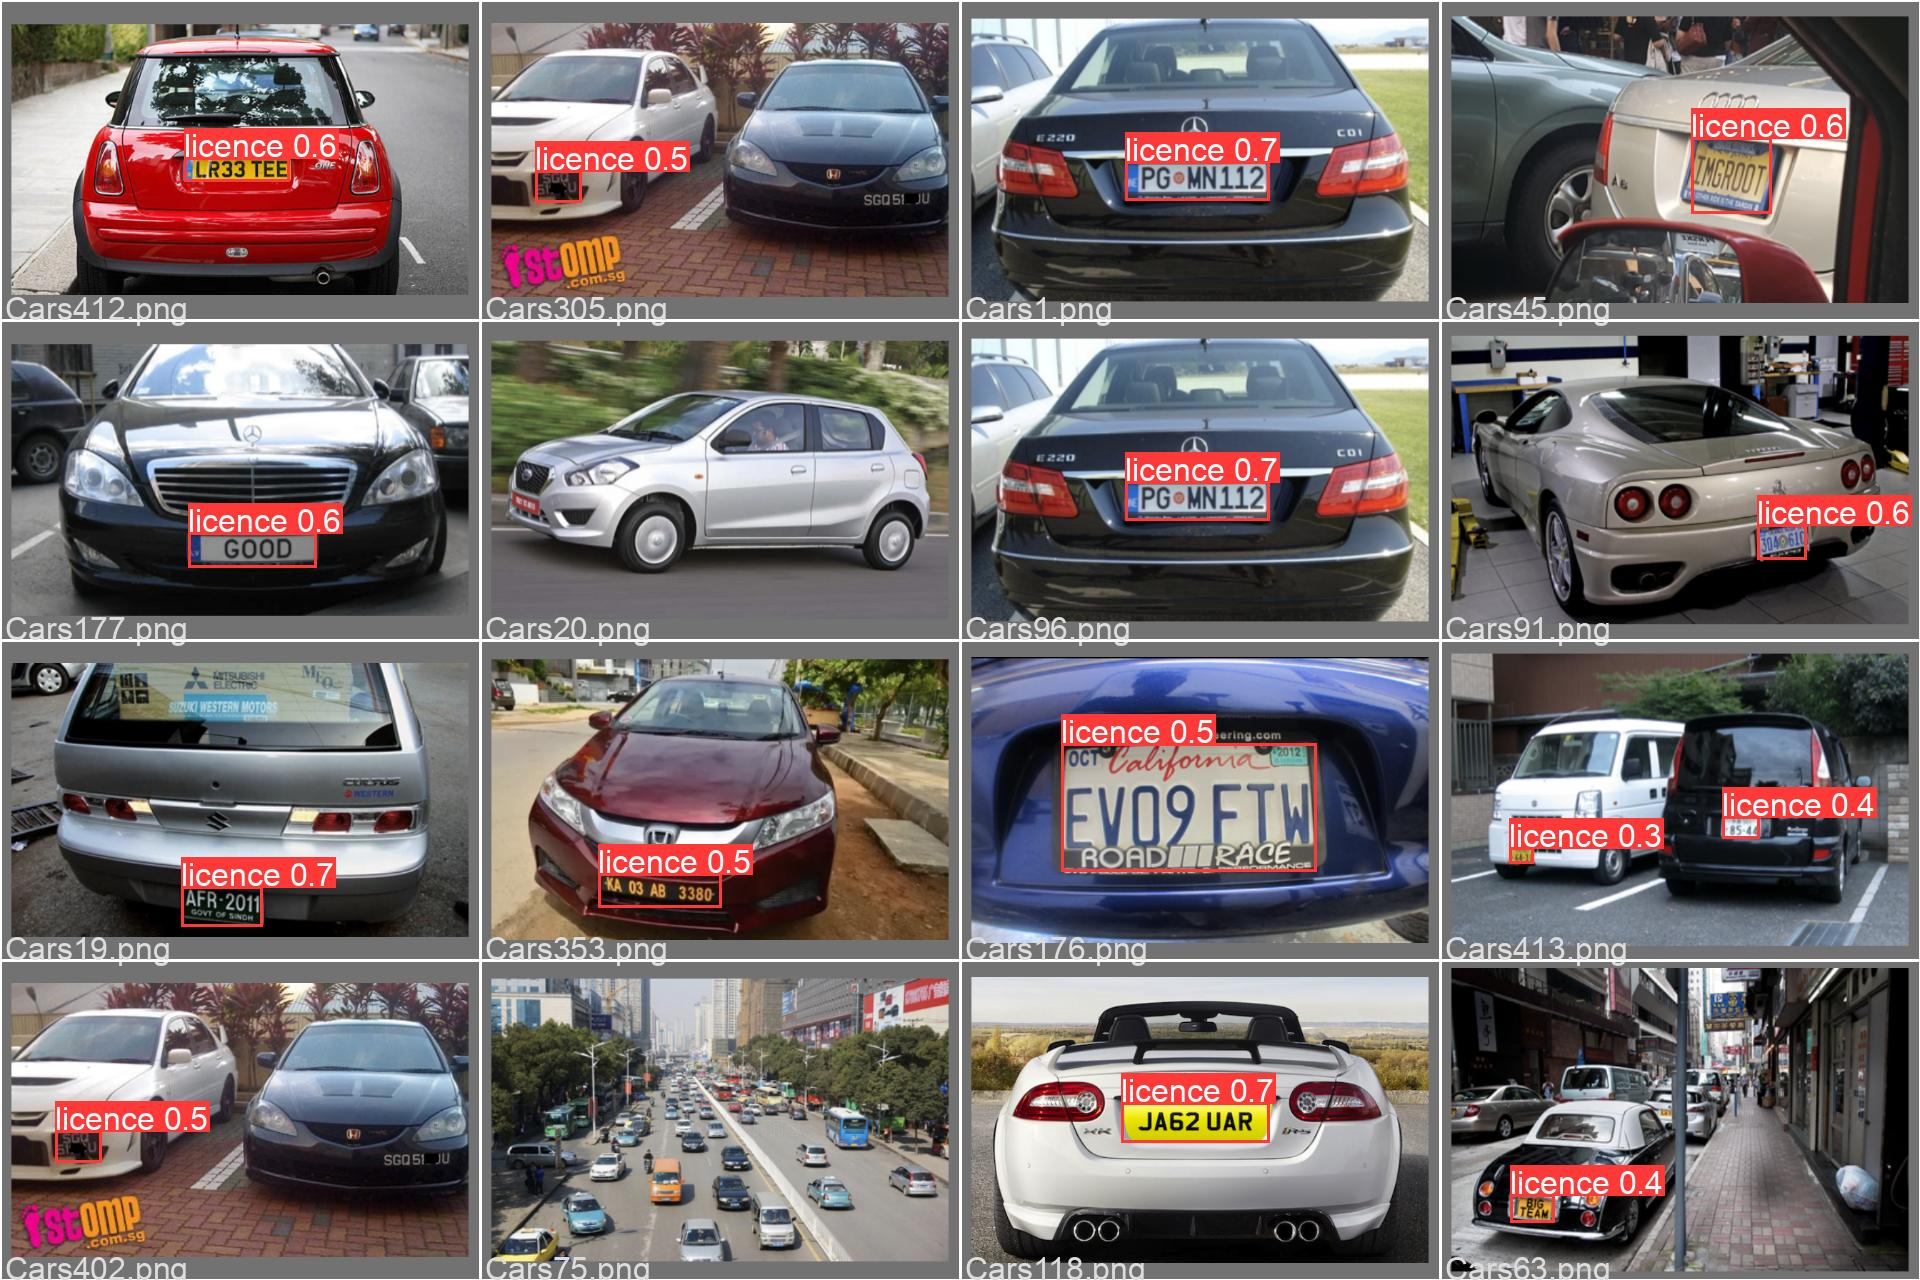

In [ ]:
Image("/content/data/output/test_result/val_batch1_pred.jpg")

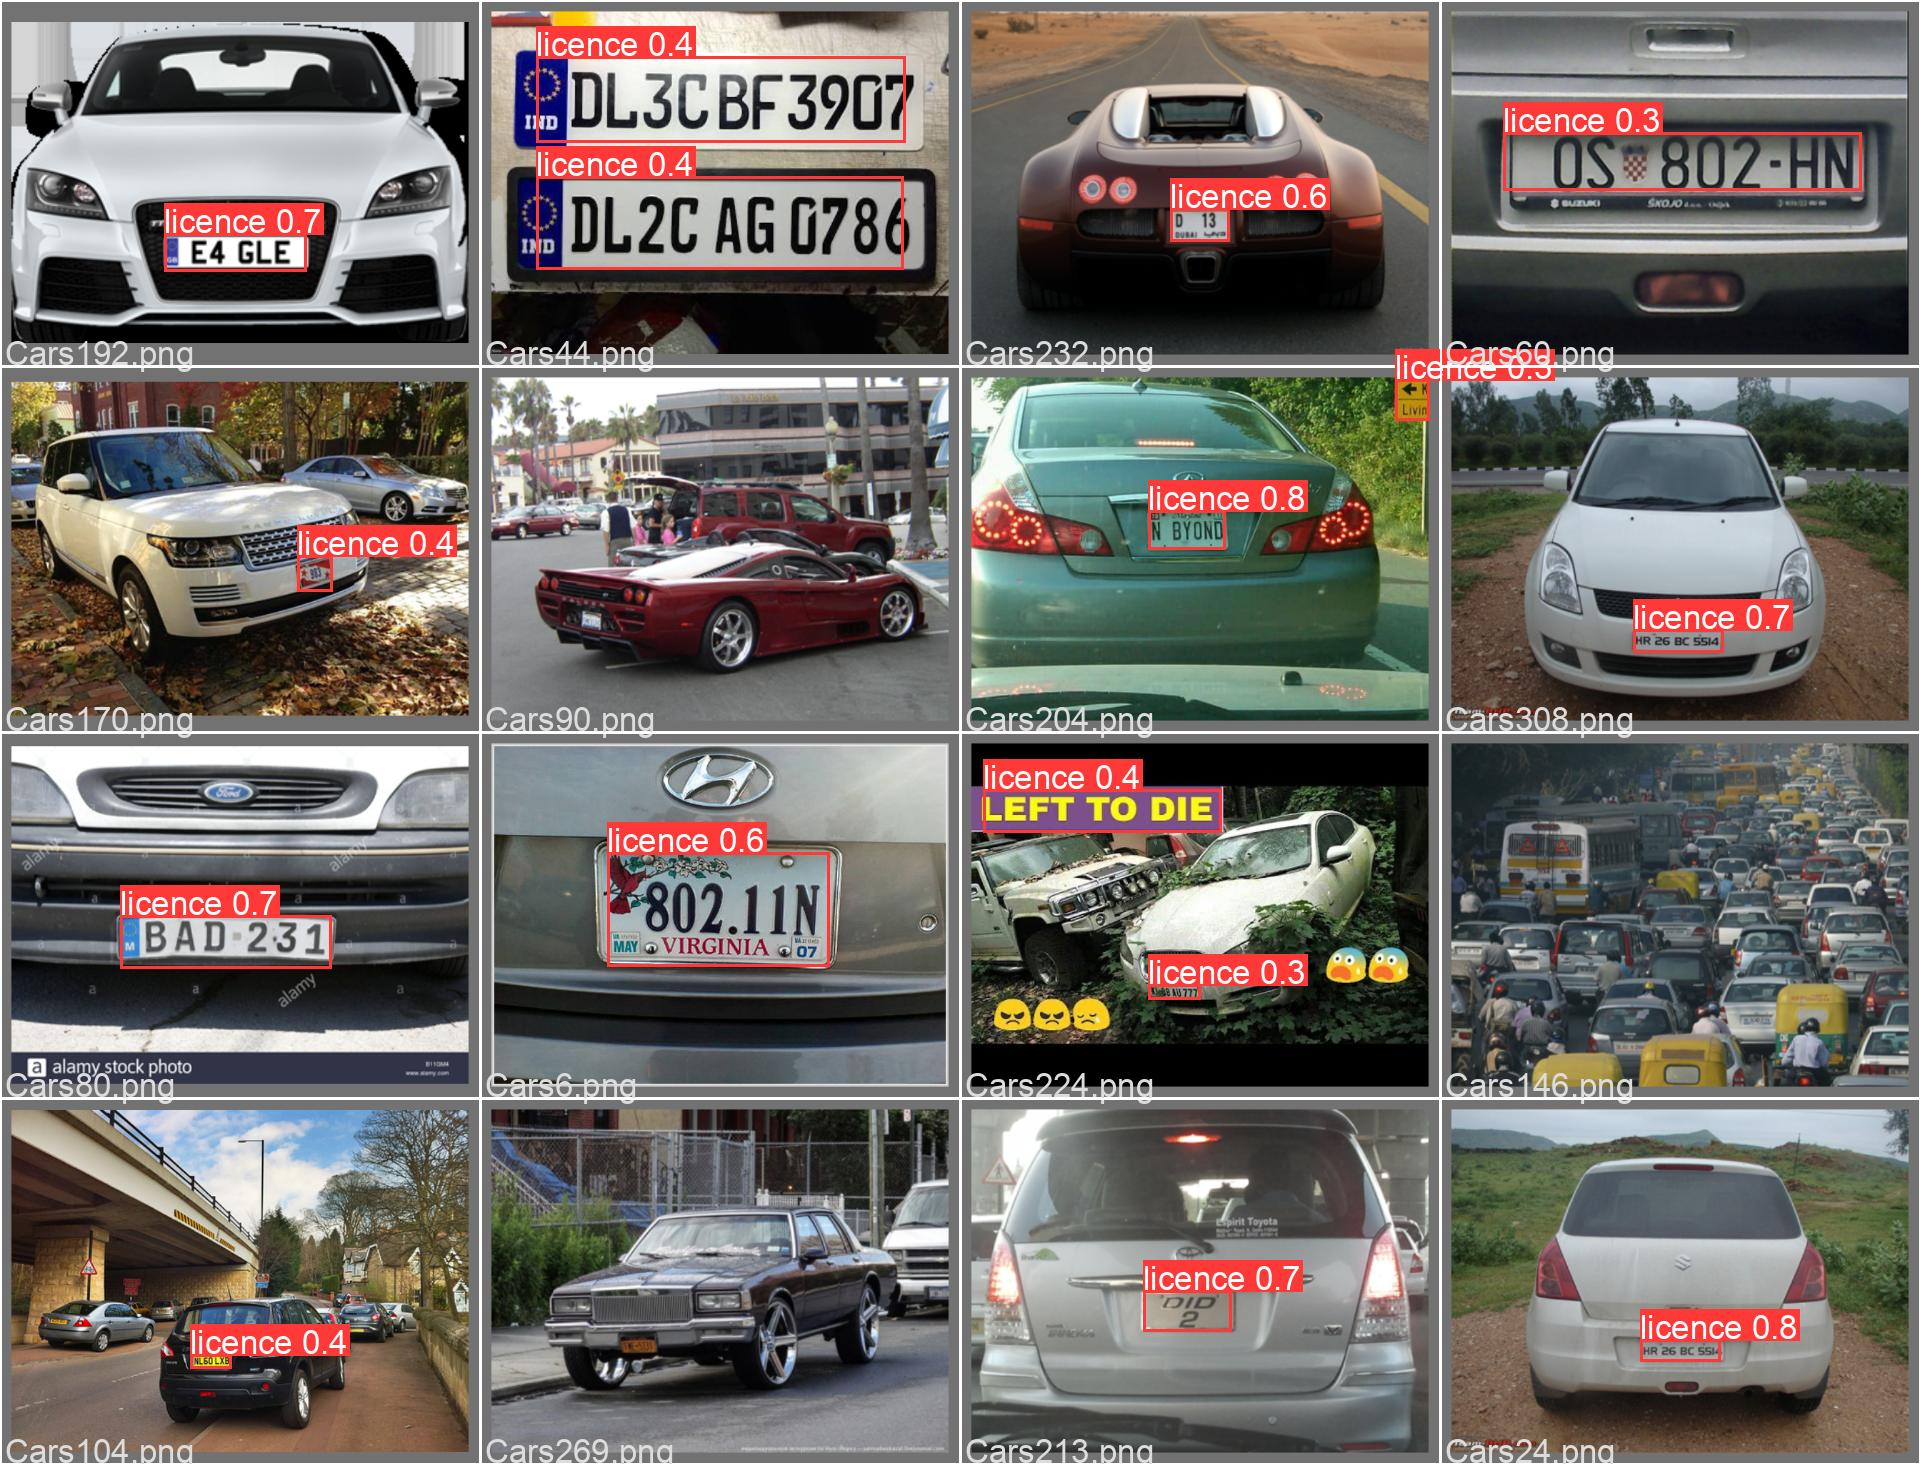

In [ ]:
Image("/content/data/output/test_result/val_batch2_pred.jpg")